In [5]:
import sys
sys.executable

'/Users/sayansahay/Desktop/llm-lab/.venv/bin/python'

In [2]:
from llm_lab import (
    Experiment,
    run_experiment,
    show_leaderboard,
    summarize_run,
    register_metric,
    compare_models,
    plot_model_metric,
)


In [3]:
@register_metric
def contains_expected(example, output):
    expected = str(example.get("expected_output", "")).lower()
    out = str(output).lower()
    return {"contains_expected": 1.0 if expected and expected in out else 0.0}

In [4]:
exp = Experiment(
    name="qa_baseline_multi",
    dataset_path="../data/qa_sample.jsonl",
    prompt_template="""
You are a concise assistant.
Answer the question briefly.

Question: {question}
Answer:
""",
    model_names=["gpt-3.5-turbo", "gpt-4o-mini"],
    metrics=["exact_match", "contains_expected"],   # ← metric names only
    model_params={"temperature": 0.0},
)

In [5]:
results = run_experiment(exp, max_examples=3)
results

[RunResult(run_id=10, experiment_name='qa_baseline_multi', model_name='gpt-3.5-turbo', num_examples=3, summary_metrics={'exact_match': 1.0, 'contains_expected': 1.0}),
 RunResult(run_id=11, experiment_name='qa_baseline_multi', model_name='gpt-4o-mini', num_examples=3, summary_metrics={'exact_match': 0.3333333333333333, 'contains_expected': 1.0})]

In [6]:
show_leaderboard(metric="exact_match")

,run_id,experiment,model_name,status,dataset_size,exact_match,created_at
1,10,qa_baseline_multi,gpt-3.5-turbo,completed,3,1.000000,2025-11-15T10:27:41.306931
3,8,qa_baseline_multi,gpt-3.5-turbo,completed,3,1.000000,2025-11-15T10:24:36.836414
5,6,qa_baseline_multi,gpt-3.5-turbo,completed,3,1.000000,2025-11-15T10:02:35.648249
7,4,qa_baseline_multi,gpt-3.5-turbo,completed,3,1.000000,2025-11-15T09:57:25.327487
0,11,qa_baseline_multi,gpt-4o-mini,completed,3,0.333333,2025-11-15T10:27:44.855983
2,9,qa_baseline_multi,gpt-4o-mini,completed,3,0.333333,2025-11-15T10:24:40.481162
4,7,qa_baseline_multi,gpt-4o-mini,completed,3,0.333333,2025-11-15T10:02:39.162513
6,5,qa_baseline_multi,gpt-4o-mini,completed,3,0.333333,2025-11-15T09:57:29.093673
8,3,qa_baseline,qa_baseline_run,completed,3,0.333333,2025-11-15T09:43:19.848971
9,2,qa_baseline,qa_baseline_run,completed,3,0.333333,2025-11-15T09:20:39.959252


In [7]:
summarize_run(results[0].run_id)
summarize_run(results[1].run_id)

Run 10 – experiment: qa_baseline_multi
Status: completed
Dataset size: 3
Summary metrics:
  exact_match: 1.0000
  contains_expected: 1.0000


,example_index,input,expected,output,metric_exact_match,metric_contains_expected
0,0,What is 2+2?,4,4,1.0,1.0
1,1,Capital of France?,Paris,Paris,1.0,1.0
2,2,Color of the sky on a clear day?,blue,Blue,1.0,1.0


Run 11 – experiment: qa_baseline_multi
Status: completed
Dataset size: 3
Summary metrics:
  exact_match: 0.3333
  contains_expected: 1.0000


,example_index,input,expected,output,metric_exact_match,metric_contains_expected
0,0,What is 2+2?,4,4,1.0,1.0
1,1,Capital of France?,Paris,Paris.,0.0,1.0
2,2,Color of the sky on a clear day?,blue,Blue.,0.0,1.0


In [8]:
import pandas as pd

def compare_models(results):
    rows = []
    for r in results:
        row = {"model_name": r.model_name}
        row.update(r.summary_metrics)
        rows.append(row)
    return pd.DataFrame(rows)

compare_models(results)

,model_name,exact_match,contains_expected
0,gpt-3.5-turbo,1.000000,1.0
1,gpt-4o-mini,0.333333,1.0


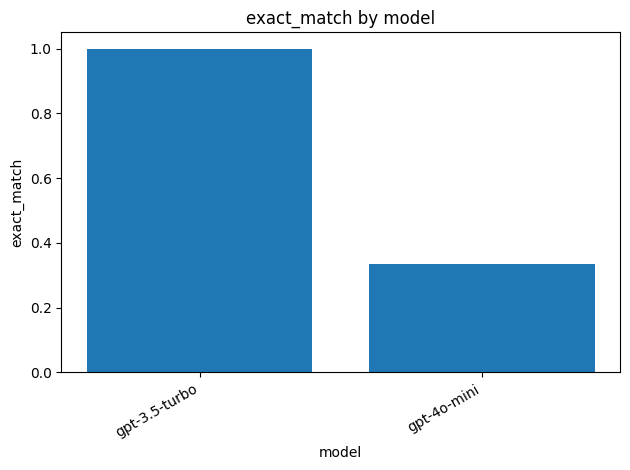

In [9]:
compare_models(results)
plot_model_metric(results, metric="exact_match")